В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [37]:
cars_df = pd.read_csv('../assets/hw_2_1/cars.csv')
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [38]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [39]:
cars_df.nunique()

Car_ID               100
Brand                 11
Model                 58
Year                   6
Kilometers_Driven     18
Fuel_Type              2
Transmission           2
Owner_Type             3
Mileage               15
Engine                36
Power                 40
Seats                  3
Price                 31
dtype: int64

In [40]:
print("=== Value types inside object columns ===")
for col in cars_df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(cars_df[col].apply(type).value_counts())

=== Value types inside object columns ===

Column: Brand
Brand
<class 'str'>    100
Name: count, dtype: int64

Column: Model
Model
<class 'str'>    100
Name: count, dtype: int64

Column: Fuel_Type
Fuel_Type
<class 'str'>    100
Name: count, dtype: int64

Column: Transmission
Transmission
<class 'str'>    100
Name: count, dtype: int64

Column: Owner_Type
Owner_Type
<class 'str'>    100
Name: count, dtype: int64


In [41]:
print("\n=== Sample unique values per object column ===")
for col in cars_df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col} ({cars_df[col].nunique()} unique values)")
    print(cars_df[col].unique())


=== Sample unique values per object column ===

Column: Brand (11 unique values)
['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']

Column: Model (58 unique values)
['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport']

Column: Fuel_Type (2 unique values)
['Petrol' 'Diesel']

Column: Transmission (2 unique values)
['Manual' 'Automatic']

Column: Owner_Type (3 unique values)
['First' 'Second' 'Third']


### Column Type Summary

There are 12 relevant features in the dataset (excluding `Car_ID` which is an identifier). Among them:

- **5 categorical columns**:
  - **2 binary**: `Fuel_Type`, `Transmission`
  - **2 multicategorical (no inherent order)**: `Brand`, `Model`
  - **1 multicategorical with ordinal relationship**: `Owner_Type` (e.g., First < Second < Third)

- **7 numerical columns with natural ordering**:
  - `Year`, `Kilometers_Driven`, `Mileage`, `Engine`, `Power`, `Seats`, `Price`

The `Car_ID` column is a unique identifier and does not hold analytical value.


**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [42]:
all_indices = cars_df.index
target_col = 'Price'
feature_cols = [col for col in cars_df.columns if col not in [target_col, 'Car_ID']]
train_idx, test_idx = train_test_split(all_indices, test_size=0.2, random_state=12)

In [43]:
print(cars_df.loc[test_idx, feature_cols].head())
print("Mean price in training set:", cars_df.loc[train_idx, target_col].mean())

         Brand   Model  Year  Kilometers_Driven Fuel_Type Transmission  \
17        Audi      Q3  2016              38000    Petrol    Automatic   
41     Hyundai  Santro  2019              26000    Petrol       Manual   
92  Volkswagen   Vento  2017              32000    Petrol       Manual   
14      Maruti  Ertiga  2020              18000    Petrol       Manual   
68        Ford  Aspire  2019              26000    Petrol       Manual   

   Owner_Type  Mileage  Engine  Power  Seats  
17     Second       15    1395    148      5  
41      Third       20    1086     68      5  
92     Second       18    1598    103      5  
14      First       19    1462    103      7  
68      Third       20    1194     94      5  
Mean price in training set: 1680000.0


**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [44]:
binary_cols = ['Fuel_Type', 'Transmission']

for col in binary_cols:
    most_common = cars_df[col].value_counts().idxmax()
    bin_col_name = col + '_bin'
    cars_df.loc[:, bin_col_name] = (cars_df[col] == most_common).astype(int)

    feature_cols.remove(col)
    feature_cols.append(bin_col_name)

In [45]:
cars_df.loc[:, 'Brand_Model'] = cars_df['Brand'] + '_' + cars_df['Model']

brand_model_freq = cars_df.loc[train_idx, 'Brand_Model'].value_counts(normalize=True)
cars_df.loc[:, 'Brand_Model_freq'] = cars_df['Brand_Model'].map(brand_model_freq).fillna(0)

feature_cols.remove('Brand')
feature_cols.remove('Model')
feature_cols.append('Brand_Model_freq')

In [46]:
ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']])
ordenc.fit(cars_df.loc[train_idx, ['Owner_Type']])

cars_df.loc[train_idx, 'Owner_Type_Codes'] = ordenc.transform(cars_df.loc[train_idx, ['Owner_Type']])
cars_df.loc[test_idx, 'Owner_Type_Codes'] = ordenc.transform(cars_df.loc[test_idx, ['Owner_Type']])

feature_cols.remove('Owner_Type')
feature_cols.append('Owner_Type_Codes')

Очікуваний результат після трансформацій:

In [47]:
pd.set_option('display.max_columns', 100)

display(cars_df.loc[train_idx, feature_cols].head())
display(cars_df.loc[test_idx, feature_cols].head())

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_bin,Transmission_bin,Brand_Model_freq,Owner_Type_Codes
83,2019,22000,18,1498,148,5,1,1,0.0250,1.0
55,2018,28000,17,1968,187,5,0,1,0.0250,0.0
26,2018,28000,15,1984,241,5,1,1,0.0250,0.0
54,2017,32000,18,1598,103,5,1,0,0.0125,1.0
19,2017,26000,12,1991,241,5,1,1,0.0125,1.0


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_bin,Transmission_bin,Brand_Model_freq,Owner_Type_Codes
17,2016,38000,15,1395,148,5,1,1,0.0000,1.0
41,2019,26000,20,1086,68,5,1,0,0.0125,2.0
92,2017,32000,18,1598,103,5,1,0,0.0125,1.0
14,2020,18000,19,1462,103,7,1,0,0.0000,0.0
68,2019,26000,20,1194,94,5,1,0,0.0125,2.0


### Description

Several preprocessing steps were applied to prepare the dataset for linear regression. All transformations were based only on the **training data**, and updates were applied using `.loc` and index-based logic to maintain consistency within the original DataFrame.

#### Binary Encoding
Binary encoding was applied to the columns `Fuel_Type` and `Transmission` as instructed. Each column was converted into a numerical representation using `0` and `1`.

#### Frequency Encoding for Combined Feature: `Brand + Model`
Since the `Model` is determined by the `Brand`, a new feature `Brand_Model` was created by combining both columns. Then, frequency encoding was applied to this combined feature based on its relative frequency in the training set. This allows the model to capture the typicality of brand-model combinations without inflating dimensionality.

#### Ordinal Encoding of `Owner_Type`
The `Owner_Type` column, containing the values `First`, `Second`, and `Third`, was encoded using `OrdinalEncoder` with an explicitly defined order. This preserves the ordinal nature of the data for downstream modeling.

---

#### One-Hot Encoding Skipped for `Brand`

One-hot encoding was intentionally skipped for the `Brand` column despite its moderate number of unique values.
Instead, frequency encoding of the combined `Brand_Model` was used to:
- keep the number of features smaller,
- avoid potential issues in linear regression caused by many related dummy variables,
- and still reflect how common each brand-model combination is in the data.

---

#### Final Feature Set

As a result of these transformations, the updated `feature_cols` list includes:
- Numeric features: `Year`, `Kilometers_Driven`, `Mileage`, `Engine`, `Power`, `Seats`
- Binary encoded flags: `Fuel_Type_bin`, `Transmission_bin`
- Frequency encoded feature: `Brand_Model_freq`
- Ordinal encoded feature: `Owner_Type_Codes`


**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

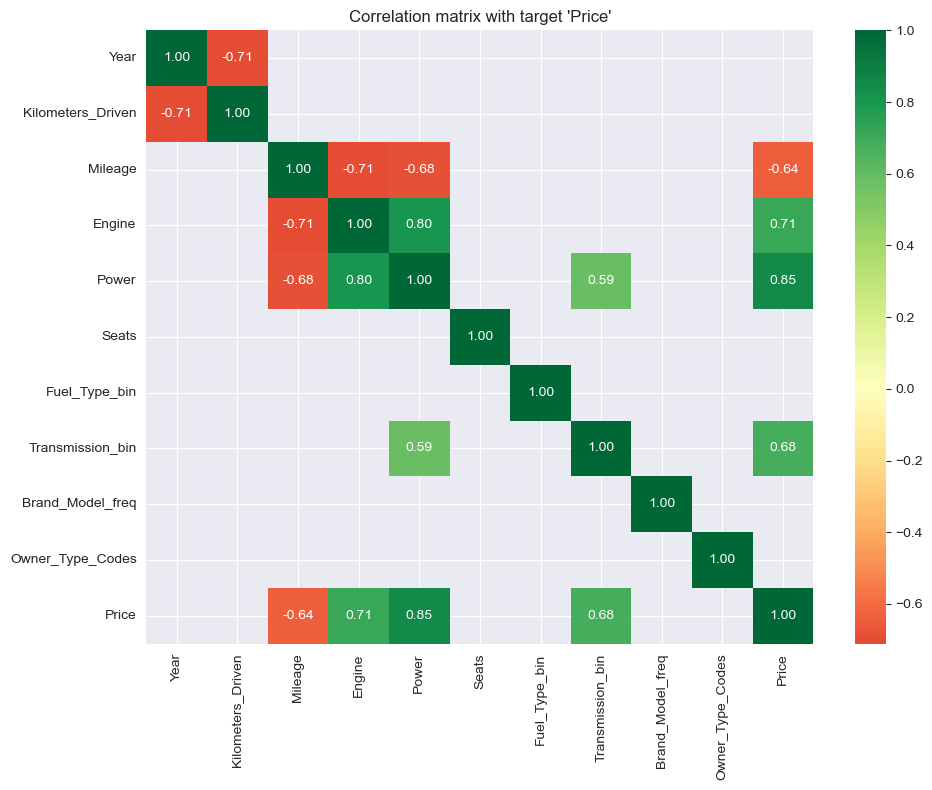


Features with correlation > 0.5 or < -0.5 with Price:
Power               0.849137
Engine              0.710561
Transmission_bin    0.680731
Mileage            -0.638404
Name: Price, dtype: float64


In [48]:
X_train_num = cars_df.loc[train_idx, feature_cols].select_dtypes(include='number')

corr_df = pd.concat([X_train_num, cars_df.loc[train_idx, 'Price']], axis=1)

corr_matrix = corr_df.corr(numeric_only=True)
mask = corr_matrix.abs() >= 0.5

plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_matrix.where(mask), annot=True, fmt=".2f", cmap='RdYlGn', cbar = True, center=0)
plt.title("Correlation matrix with target 'Price'")
plt.tight_layout()
plt.show()

target_corr = corr_matrix['Price'].drop('Price')
high_corr_features = target_corr[abs(target_corr) > 0.5]
print("\nFeatures with correlation > 0.5 or < -0.5 with Price:")
print(high_corr_features.sort_values(ascending=False))

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [49]:
X_train = cars_df.loc[train_idx, feature_cols]
X_test = cars_df.loc[test_idx, feature_cols]

y_train = cars_df.loc[train_idx, 'Price']
y_test = cars_df.loc[test_idx, 'Price']

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

def check_model_metrix(y_tr, y_te, y_tr_pred, y_te_pred):
    rmse_train = root_mean_squared_error(y_tr, y_tr_pred)
    rmse_test = root_mean_squared_error(y_te, y_te_pred)

    r2_train = r2_score(y_tr, y_tr_pred)
    r2_test = r2_score(y_te, y_te_pred)

    print(f"Train RMSE: {rmse_train:.2f}")
    print(f"Test RMSE:  {rmse_test:.2f}")
    print(f"Train R^2:   {r2_train:.4f}")
    print(f"Test R^2:   {r2_test:.4f}")

check_model_metrix(y_train, y_test, y_train_pred, y_test_pred)

Train RMSE: 421319.17
Test RMSE:  323098.24
Train R^2:   0.8339
Test R^2:   0.7692


Train RMSE: 421319.17
Test RMSE:  323098.24
Train R^2:   0.8339
Test R^2:   0.7692


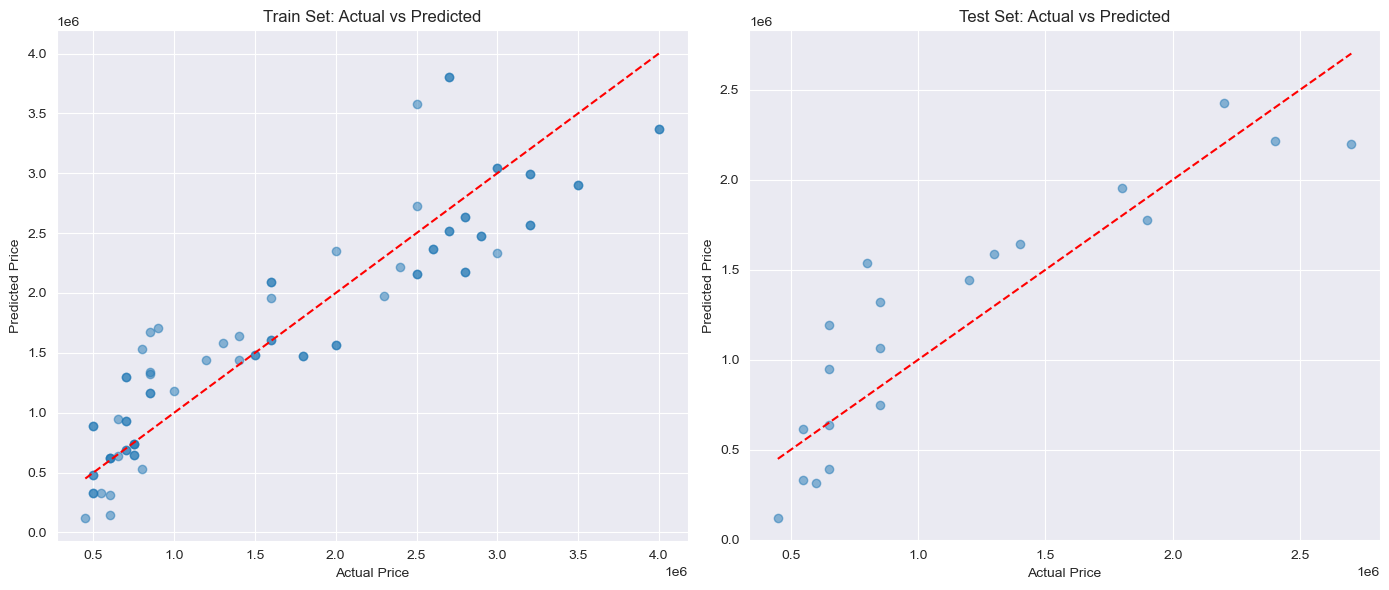

In [50]:
def check_model_metrix(y_tr, y_te, y_tr_pred, y_te_pred):
    rmse_train = root_mean_squared_error(y_tr, y_tr_pred)
    rmse_test = root_mean_squared_error(y_te, y_te_pred)

    r2_train = r2_score(y_tr, y_tr_pred)
    r2_test = r2_score(y_te, y_te_pred)

    print(f"Train RMSE: {rmse_train:.2f}")
    print(f"Test RMSE:  {rmse_test:.2f}")
    print(f"Train R^2:   {r2_train:.4f}")
    print(f"Test R^2:   {r2_test:.4f}")

check_model_metrix(y_train, y_test, y_train_pred, y_test_pred)

def build_model_plot(y_tr, y_te, y_tr_pred, y_te_pred):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(y_tr, y_tr_pred, alpha=0.5, label='Train')
    plt.plot([y_tr.min(), y_tr.max()], [y_tr.min(), y_tr.max()], 'r--')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title("Train Set: Actual vs Predicted")
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.scatter(y_te, y_te_pred, alpha=0.5, label='Test')
    plt.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], 'r--')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title("Test Set: Actual vs Predicted")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

build_model_plot(y_train, y_test, y_train_pred, y_test_pred)

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

y_scaled_train_pred = model_scaled.predict(X_train_scaled)
y_scaled_test_pred = model_scaled.predict(X_test_scaled)

check_model_metrix(y_train, y_test, y_scaled_train_pred, y_scaled_test_pred)

Train RMSE: 421319.17
Test RMSE:  323098.24
Train R^2:   0.8339
Test R^2:   0.7692


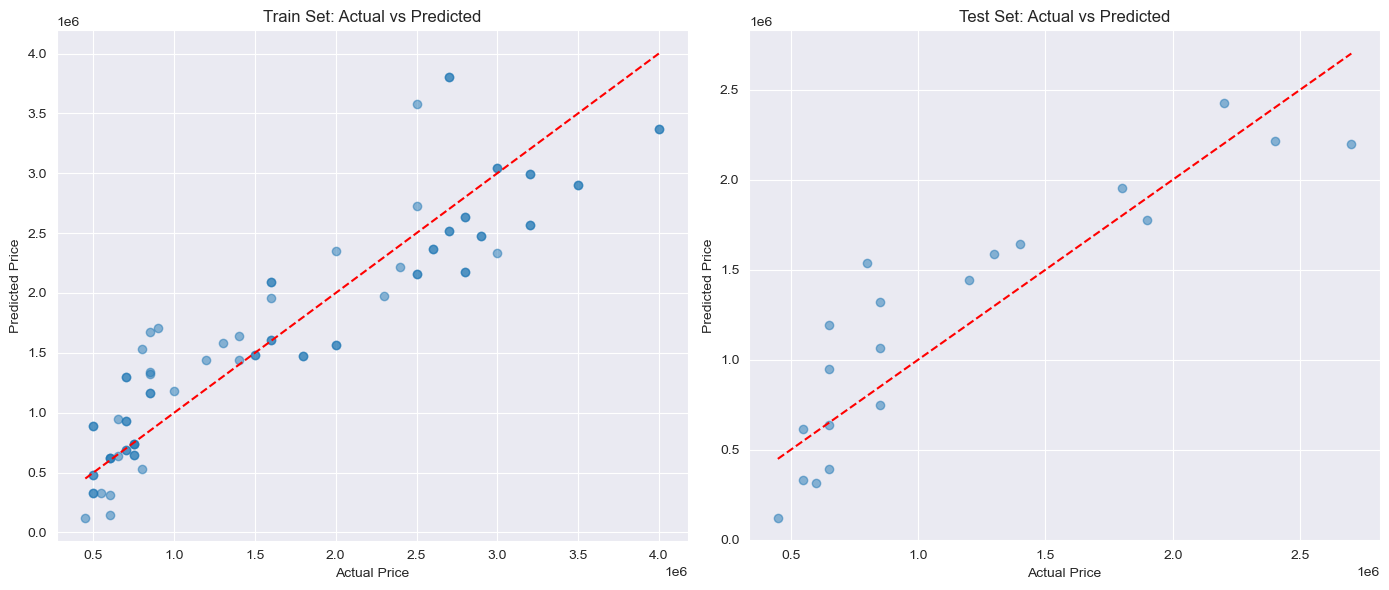

In [52]:
build_model_plot(y_train, y_test, y_scaled_train_pred, y_scaled_test_pred)

In [53]:
weights_df = pd.DataFrame({
    'feature': np.append(feature_cols, 'intercept'),
    'original_model': np.append(model.coef_, model.intercept_),
    'scaled_model': np.append(model_scaled.coef_, model_scaled.intercept_)
})

weights_df['abs_scaled'] = weights_df['scaled_model'].abs()

weights_df_sorted = weights_df.sort_values(by='abs_scaled', ascending=False)

display(weights_df_sorted.round(0))

,feature,original_model,scaled_model,abs_scaled
10,intercept,199068160.0,1680000.0,1680000.0
4,Power,8324.0,677741.0,677741.0
7,Transmission_bin,560883.0,273250.0,273250.0
1,Kilometers_Driven,-23.0,-212511.0,212511.0
2,Mileage,-55095.0,-187919.0,187919.0
6,Fuel_Type_bin,-360845.0,-180366.0,180366.0
3,Engine,-233.0,-153097.0,153097.0
9,Owner_Type_Codes,-176380.0,-115323.0,115323.0
0,Year,-97738.0,-109540.0,109540.0
5,Seats,104834.0,77703.0,77703.0


### Summary

To evaluate the influence of each feature on price prediction, two linear regression models were trained:

1. One on the **original (unscaled) data**.
2. Another on **standardized data**, using `StandardScaler` to bring all features to a common scale.

#### Most influential features (by absolute value of standardized coefficients):

| Feature               | Direction of influence |
|------------------------|------------------------|
| **Power**              | Positive               |
| **Transmission_bin**   | Positive               |
| **Kilometers_Driven**  | Negative               |
| **Mileage**            | Negative               |
| **Fuel_Type_bin**      | Negative               |

These features have the strongest impact on predicting car price.
- For example, `Power` increases the predicted price as expected.
- `Mileage` and `Kilometers_Driven` have negative coefficients, meaning that more usage reduces the value.


**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [54]:
X_train_scaled_const = sm.add_constant(pd.DataFrame(X_train_scaled, columns=feature_cols, index=y_train.index))

ols_model = sm.OLS(y_train, X_train_scaled_const)
ols_results = ols_model.fit()

print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     34.65
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           4.85e-23
Time:                        12:47:50   Log-Likelihood:                -1149.6
No. Observations:                  80   AIC:                             2321.
Df Residuals:                      69   BIC:                             2347.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   5.07e+0

In [55]:
summary_df = ols_results.summary2().tables[1]

significant_features = summary_df[summary_df['P>|t|'] < 0.05]
significant_feature_names = significant_features.index.tolist()

significant_feature_names = [f for f in significant_feature_names if f != 'const']

print("Significant features at alpha = 0.05:")
for feature in significant_feature_names:
    print("-", feature)

Significant features at alpha = 0.05:
- Kilometers_Driven
- Mileage
- Power
- Fuel_Type_bin
- Transmission_bin


**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [56]:
X_sig = pd.DataFrame(X_train_scaled, columns=feature_cols, index=y_train.index)[significant_feature_names]
X_sig_const = sm.add_constant(X_sig)

ols_sig_model = sm.OLS(y_train, X_sig_const)
ols_sig_results = ols_sig_model.fit()
print(ols_sig_results.summary())

print("Full model R²: ", round(ols_results.rsquared, 4))
print("Full model Adj. R²: ", round(ols_results.rsquared_adj, 4))

print("Reduced model R²: ", round(ols_sig_results.rsquared, 4))
print("Reduced model Adj. R²: ", round(ols_sig_results.rsquared_adj, 4))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     65.86
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           7.50e-26
Time:                        12:47:51   Log-Likelihood:                -1153.6
No. Observations:                  80   AIC:                             2319.
Df Residuals:                      74   BIC:                             2333.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   5.15e+0

### Summary

A new linear regression model was trained using only features that were statistically significant (p-value < 0.05) in the previous `statsmodels` OLS model. The following six predictors were retained:

- Kilometers_Driven
- Mileage
- Power
- Fuel_Type_bin
- Transmission_bin

#### Model Performance Comparison:

| Metric               | Full Model | Reduced Model |
|----------------------|------------|----------------|
| R-squared            | 0.8339     | 0.8165         |
| Adjusted R-squared   | 0.8099     | 0.8041         |

Despite removing several predictors, the reduced model maintained a very similar level of performance, especially in adjusted R² (from 0.8099 to 0.8041).
This indicates that the excluded features had minimal contribution and could be safely removed to simplify the model.

- `Power`, `Fuel_Type_bin`, and `Transmission_bin` had **strong positive or negative impact**, with highly significant p-values (p < 0.001).
- `Kilometers_Driven` and `Mileage` had **negative coefficients**, indicating that higher usage reduces predicted price — which aligns with domain logic.
- The model remains interpretable, compact, and statistically sound without sacrificing explanatory power.


**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [57]:
summary_df = ols_results.summary2().tables[1]
expanded_features = summary_df[summary_df['P>|t|'] < 0.25].index.tolist()
expanded_features = [f for f in expanded_features if f != 'const']

X_train_expanded = pd.DataFrame(X_train_scaled, columns=feature_cols, index=y_train.index)[expanded_features]
X_train_expanded_const = sm.add_constant(X_train_expanded)

ols_expanded_model = sm.OLS(y_train, X_train_expanded_const)
ols_expanded_results = ols_expanded_model.fit()

print(ols_expanded_results.summary())

print("\nR² Comparison:")
print("Full model R²:         ", round(ols_results.rsquared, 4))
print("Full model Adj. R²:    ", round(ols_results.rsquared_adj, 4))

print("Strict model R²:       ", round(ols_sig_results.rsquared, 4))
print("Strict model Adj. R²:  ", round(ols_sig_results.rsquared_adj, 4))

print("Expanded model R²:     ", round(ols_expanded_results.rsquared, 4))
print("Expanded model Adj. R²:", round(ols_expanded_results.rsquared_adj, 4))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     39.00
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           7.81e-24
Time:                        12:47:51   Log-Likelihood:                -1149.7
No. Observations:                  80   AIC:                             2319.
Df Residuals:                      70   BIC:                             2343.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   5.04e+0

### Summary

A new linear regression model was trained using all features from the full model (Task 7) whose p-values were less than 0.25. This **expanded model** includes moderately significant predictors that may not pass strict thresholds but can still contribute to overall model quality.

#### Model performance comparison:

| Metric               | Full Model (Task 7) | Strict Model (p < 0.05, Task 9) | Expanded Model (p < 0.25, Task 10) |
|----------------------|---------------------|----------------------------------|------------------------------------|
| R-squared            | 0.8339              | 0.8165                           | 0.8337                             |
| Adjusted R-squared   | 0.8099              | 0.8041                           | 0.8124                             |

- The **strict model** provides the highest interpretability, using only statistically strong predictors, but with slightly lower performance.
- The **expanded model** nearly matches the full model in both R² and adjusted R², while using fewer variables and excluding statistically weak ones.
- The **full model** has the highest raw R², but includes features that are not statistically meaningful and might not generalize well.

#### Conclusion:

Among the three options:
- Use the **strict model** when interpretability and feature clarity are essential.
- Use the **full model** only if you require maximal explanatory power and can justify inclusion of all predictors.
- Prefer the **expanded model** for practical use, as it maintains high performance (Adj. R² = 0.8124) while being more parsimonious and statistically justified.

👉 **Recommended model:** **Expanded model (p < 0.25)**
